<a href="https://colab.research.google.com/github/thiagodavirosa/dm/blob/main/Minera%C3%A7%C3%A3o_de_dados_RNA%2C_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚚**Assessment of flexible highway pavement deflection using Intelligent Pavement Assessment to estimate deflection in adjacent lanes with the use of Machine Learning.**


##Importing the python libraries and database

Python libraries


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from matplotlib.gridspec import GridSpec
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Database

In [113]:
df = pd.read_excel('base_tratada.xlsx')
df

,ID_FWD,D0_FWD,ID_IPAVE,SCI_200,SCI_300,SCI_SUBGRADE,D0,D100,D200,D300,...,D600,D900,D1200,D1500,D1800,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,18093,25.4,206973,69.0,112.6,-13.2,253.9,228.6,184.9,141.3,...,49.0,22.1,14.4,8.9,5.1,1.43,71.8,3.6,8.0,0.005234
1,14722,46.9,1132107,316.1,412.6,-8.8,530.7,400.5,214.6,118.1,...,30.8,14.7,9.6,5.9,3.4,11.65,74.1,-2.5,-4.4,0.002933
2,99319,24.3,651534,70.9,110.1,-14.2,207.4,181.2,136.5,97.3,...,41.1,20.6,11.0,6.4,3.7,1.00,41.4,-1.0,2.9,0.004127
3,81996,36.2,748867,98.9,147.4,-16.8,301.3,263.2,202.5,153.9,...,61.8,28.0,18.2,11.2,6.4,1.74,77.9,-4.9,-7.2,0.002984
4,162716,13.8,449240,33.1,51.4,-9.6,111.0,98.5,78.0,59.6,...,26.8,14.5,8.3,5.0,2.9,1.07,74.0,-3.4,-14.7,0.004573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20945,31594,21.5,568315,61.9,92.1,-7.0,155.0,131.6,93.2,63.0,...,23.3,12.5,8.4,5.5,3.4,1.58,40.2,-3.0,-3.2,0.000862
20946,262236,62.6,1071439,219.4,323.9,-4.7,490.9,406.3,271.5,167.0,...,28.8,7.7,5.0,3.0,1.7,1.36,54.2,-4.0,-3.6,0.003228
20947,264868,43.7,1088671,287.6,395.9,-43.9,632.0,517.2,344.4,236.1,...,116.2,75.3,48.7,31.5,19.4,1.86,67.5,-4.3,-2.7,0.005397
20948,99123,70.3,655455,69.3,114.0,-25.1,269.1,245.0,199.8,155.1,...,76.6,49.8,35.7,24.6,16.1,1.63,79.3,1.3,8.3,0.004847


##Processing the data

Filling in missing data with linear interpolation

In [4]:
df.interpolate(method='linear', inplace=True)

Defining the variable of interest

In [7]:
y = df['D0_FWD']
y

0        25.4
1        46.9
2        24.3
3        36.2
4        13.8
         ... 
20945    21.5
20946    62.6
20947    43.7
20948    70.3
20949    27.7
Name: D0_FWD, Length: 20950, dtype: float64

Defining the predictor variables

In [9]:
x = df.drop(df.columns[[0, 1, 2]], axis = 1)
x

,SCI_200,SCI_300,SCI_SUBGRADE,D0,D100,D200,D300,D450,D600,D900,D1200,D1500,D1800,IRI_AVG (in/mi),SURVEY_SPEED,VT_AR,VT_PAV,DISTANCE
0,69.0,112.6,-13.2,253.9,228.6,184.9,141.3,84.8,49.0,22.1,14.4,8.9,5.1,1.43,71.8,3.6,8.0,0.005234
1,316.1,412.6,-8.8,530.7,400.5,214.6,118.1,56.7,30.8,14.7,9.6,5.9,3.4,11.65,74.1,-2.5,-4.4,0.002933
2,70.9,110.1,-14.2,207.4,181.2,136.5,97.3,61.4,41.1,20.6,11.0,6.4,3.7,1.00,41.4,-1.0,2.9,0.004127
3,98.9,147.4,-16.8,301.3,263.2,202.5,153.9,100.3,61.8,28.0,18.2,11.2,6.4,1.74,77.9,-4.9,-7.2,0.002984
4,33.1,51.4,-9.6,111.0,98.5,78.0,59.6,39.1,26.8,14.5,8.3,5.0,2.9,1.07,74.0,-3.4,-14.7,0.004573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20945,61.9,92.1,-7.0,155.0,131.6,93.2,63.0,37.1,23.3,12.5,8.4,5.5,3.4,1.58,40.2,-3.0,-3.2,0.000862
20946,219.4,323.9,-4.7,490.9,406.3,271.5,167.0,71.3,28.8,7.7,5.0,3.0,1.7,1.36,54.2,-4.0,-3.6,0.003228
20947,287.6,395.9,-43.9,632.0,517.2,344.4,236.1,154.3,116.2,75.3,48.7,31.5,19.4,1.86,67.5,-4.3,-2.7,0.005397
20948,69.3,114.0,-25.1,269.1,245.0,199.8,155.1,105.7,76.6,49.8,35.7,24.6,16.1,1.63,79.3,1.3,8.3,0.004847


Separating training and testing data

In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=0)

##Deep Neural Network (DNN)

###Applying the DNN algorithm

Create the DNN architecture

In [11]:
modelo = Sequential()
modelo.add(Dense(units=64, activation="relu", input_dim=x_treino.shape[1]))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dense(units=1, activation="linear"))

Compiling and training the model with the selected hyperparameters

In [32]:
modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
resultado = modelo.fit(x_treino, y_treino, epochs=400, batch_size=32, validation_data=(x_teste, y_teste))

Epoch 1/400
439/439 [==============================] - 3s 4ms/step - loss: 310.3592 - mae: 12.3067 - val_loss: 333.9552 - val_mae: 13.0368
Epoch 2/400
439/439 [==============================] - 1s 3ms/step - loss: 316.9338 - mae: 12.3699 - val_loss: 366.2845 - val_mae: 13.4336
Epoch 3/400
439/439 [==============================] - 1s 3ms/step - loss: 310.3877 - mae: 12.2997 - val_loss: 367.6072 - val_mae: 13.2757
Epoch 4/400
439/439 [==============================] - 1s 3ms/step - loss: 311.9424 - mae: 12.3406 - val_loss: 343.2930 - val_mae: 13.3595
Epoch 5/400
439/439 [==============================] - 1s 3ms/step - loss: 312.6201 - mae: 12.3643 - val_loss: 422.5854 - val_mae: 13.4934
Epoch 6/400
439/439 [==============================] - 1s 3ms/step - loss: 310.8192 - mae: 12.3101 - val_loss: 474.0686 - val_mae: 13.4632
Epoch 7/400
439/439 [==============================] - 1s 3ms/step - loss: 310.9669 - mae: 12.3219 - val_loss: 352.8849 - val_mae: 13.2094
Epoch 8/400
439/439 [======

Plotting performance results

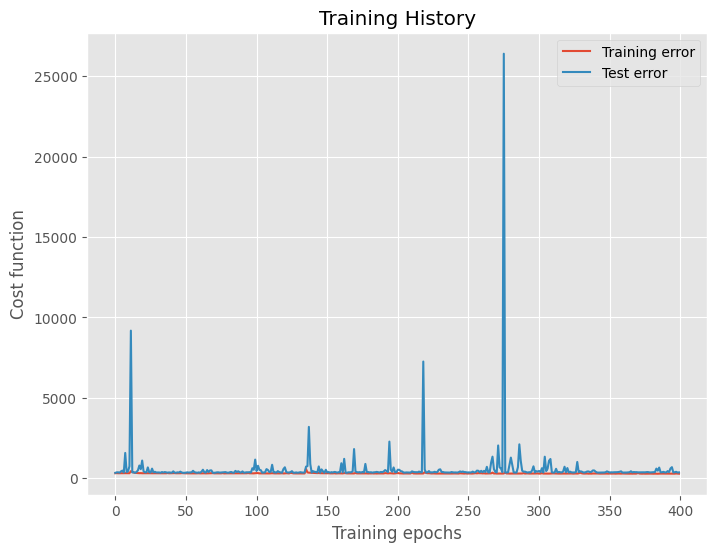

In [36]:
# Define style
plt.style.use('ggplot')

# Line chart
plt.figure(figsize=(8, 6))
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])

# Set labels and title
plt.title('Training History')
plt.ylabel('Cost function')
plt.xlabel('Training epochs')
plt.legend(['Training error', 'Test error'])

# Show graphic
plt.show()

217/217 [==============================] - 0s 1ms/step


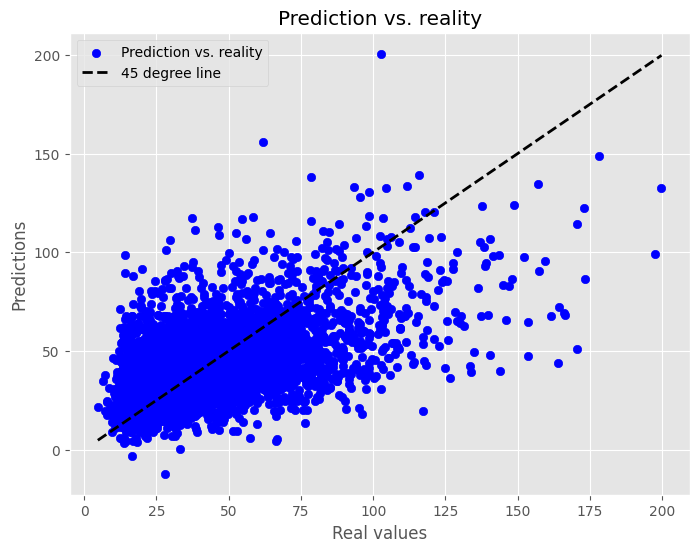

In [37]:
# Make predictions on the test set
y_pred = modelo.predict(x_teste).flatten()

# Define style
plt.style.use('ggplot')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_pred, c='b', marker='o', label='Prediction vs. reality')

# 45 degree line
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], 'k--', lw=2, label='45 degree line')

# Set labels and title
plt.xlabel('Real values')
plt.ylabel('Predictions')
plt.title('Prediction vs. reality')
plt.legend()

# Show graphic
plt.show()


Calculating performance metrics

In [38]:
# Calculate performance metrics
mse = mean_squared_error(y_teste, y_pred)
mae = mean_absolute_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

# Print metrics
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R²: ", r2)

MSE:  363.9007266820794
MAE:  13.900477492796192
RMSE:  19.07618218308054
R²:  0.26714454278674704


###Applying cross-validation

Cross-validation

In [42]:
# Initialize lists to store performance metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []
rmse_scores = []

# Initialize lists to store performance metrics at each iteration
mse_per_iteration = []
mae_per_iteration = []

# Number of folds for cross validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model as mentioned previously
    modelo = Sequential()
    modelo.add(Dense(units=3, activation="relu", input_dim=x_treino.shape[1]))
    modelo.add(Dense(units=3, activation="relu", input_dim=x_treino.shape[1]))
    modelo.add(Dense(units=3, activation="relu", input_dim=x_treino.shape[1]))
    modelo.add(Dense(units=3, activation="relu", input_dim=x_treino.shape[1]))
    modelo.add(Dense(units=1, activation="linear"))
    modelo.compile(loss='mse', optimizer='adam', metrics=['mae'])
    resultado = modelo.fit(x_train, y_train, epochs=400, batch_size=32, validation_data=(x_test, y_test))

    # Calculate performance metrics
    y_pred = modelo.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Calculate the RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mse)

    # Store performance metrics in their respective lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    # Store performance metrics in each iteration
    mse_per_iteration.append(mse)
    mae_per_iteration.append(mae)

Epoch 1/400
524/524 [==============================] - 2s 3ms/step - loss: 2685.6802 - mae: 22.9701 - val_loss: 3811.3167 - val_mae: 19.6706
Epoch 2/400
524/524 [==============================] - 1s 3ms/step - loss: 1039.1396 - mae: 16.7660 - val_loss: 2038.4915 - val_mae: 15.0948
Epoch 3/400
524/524 [==============================] - 1s 2ms/step - loss: 638.8547 - mae: 14.8262 - val_loss: 943.1030 - val_mae: 14.1392
Epoch 4/400
524/524 [==============================] - 1s 2ms/step - loss: 504.8776 - mae: 13.9369 - val_loss: 657.3417 - val_mae: 14.0355
Epoch 5/400
524/524 [==============================] - 1s 3ms/step - loss: 467.1320 - mae: 14.0177 - val_loss: 593.7462 - val_mae: 14.1038
Epoch 6/400
524/524 [==============================] - 2s 3ms/step - loss: 447.6172 - mae: 14.0826 - val_loss: 521.4084 - val_mae: 13.9779
Epoch 7/400
524/524 [==============================] - 2s 3ms/step - loss: 436.6848 - mae: 14.1300 - val_loss: 497.6284 - val_mae: 14.2255
Epoch 8/400
524/524 [==

Calculating performance metrics

In [47]:
# Calculate summary metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Display or store summary metrics
print("MSE Average:", avg_mse)
print("MAE Average:", avg_mae)
print("RMSE Average:", avg_rmse)
print("R² Average:", avg_r2)

MSE Average: 427.92301812561556
MAE Average: 14.244600862059674
RMSE Average: 20.62799108088515
R² Average: 0.17764551853531824


Plotting performance results

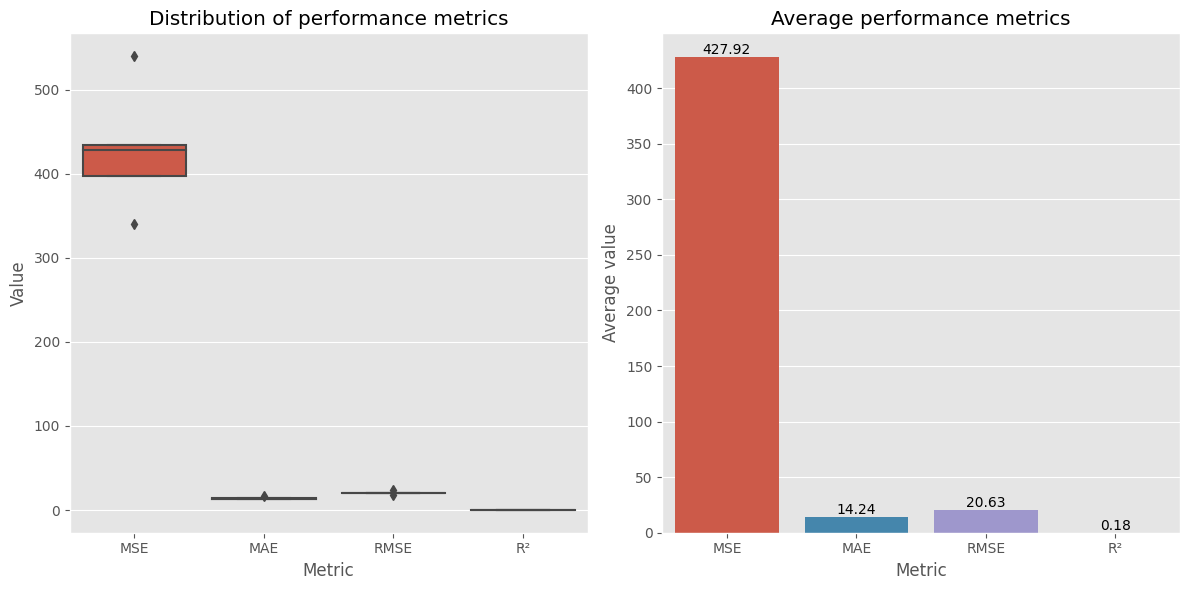

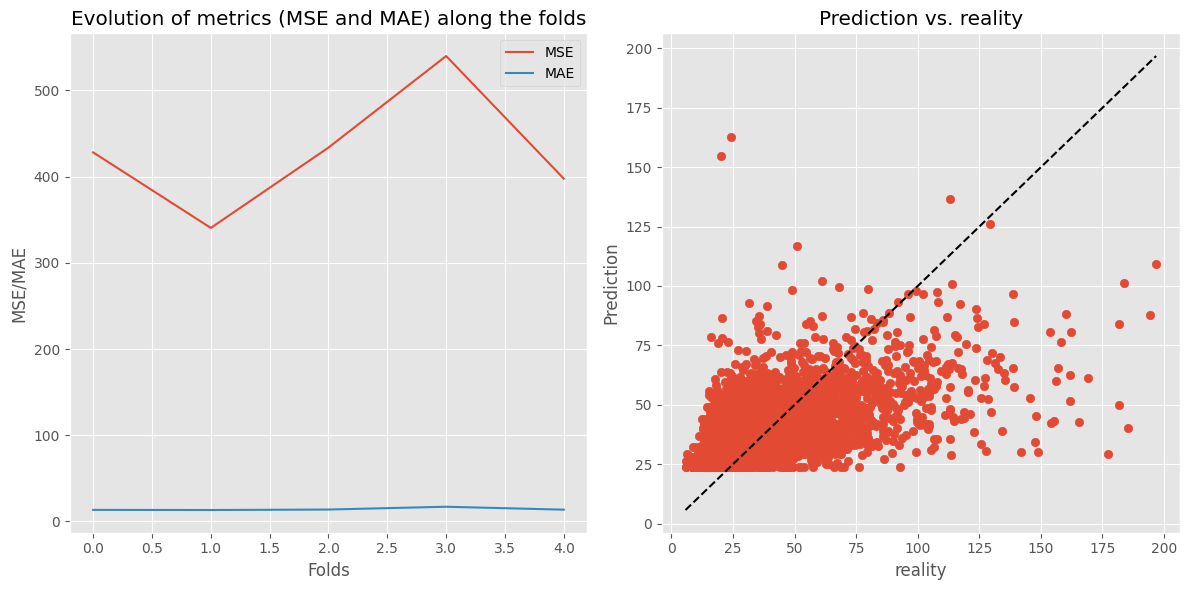

In [61]:
# Metrics data for all folds
mse_scores
mae_scores
rmse_scores
r2_scores

# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores])
plt.xticks([0, 1, 2, 3], ['MSE', 'MAE', 'RMSE', 'R²'])
plt.title('Distribution of performance metrics')
plt.xlabel('Metric')
plt.ylabel('Value')


# Bar Chart
plt.subplot(1, 2, 2)
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
metricas_labels = ['MSE', 'MAE', 'RMSE', 'R²']
sns.barplot(x=metricas_labels, y=metricas_medias)
plt.ylabel('Average value')
plt.title('Average performance metrics')
plt.xlabel('Metric')

for i, value in enumerate(metricas_medias):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Line Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mse_per_iteration, label='MSE')
plt.plot(mae_per_iteration, label='MAE')
plt.title('Evolution of metrics (MSE and MAE) along the folds')
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')
plt.legend()
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')


# Scater plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Prediction vs. reality')
plt.xlabel('reality')
plt.ylabel('Prediction')

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()

# Show graphics
plt.show()


#Random Forest (RF)

###Applying the RF algorithm

Create the RF architecture

In [65]:
estimator = 500
rf_model = RandomForestRegressor(n_estimators=estimator, random_state=0)

Compiling and training the model with the selected hyperparameters

In [66]:
rf_model.fit(x_treino, y_treino)
y_pred_rf = rf_model.predict(x_teste)
y_pred_rf_treino = rf_model.predict(x_treino)

RandomForestRegressor(n_estimators=500, random_state=0)

Plotting performance results

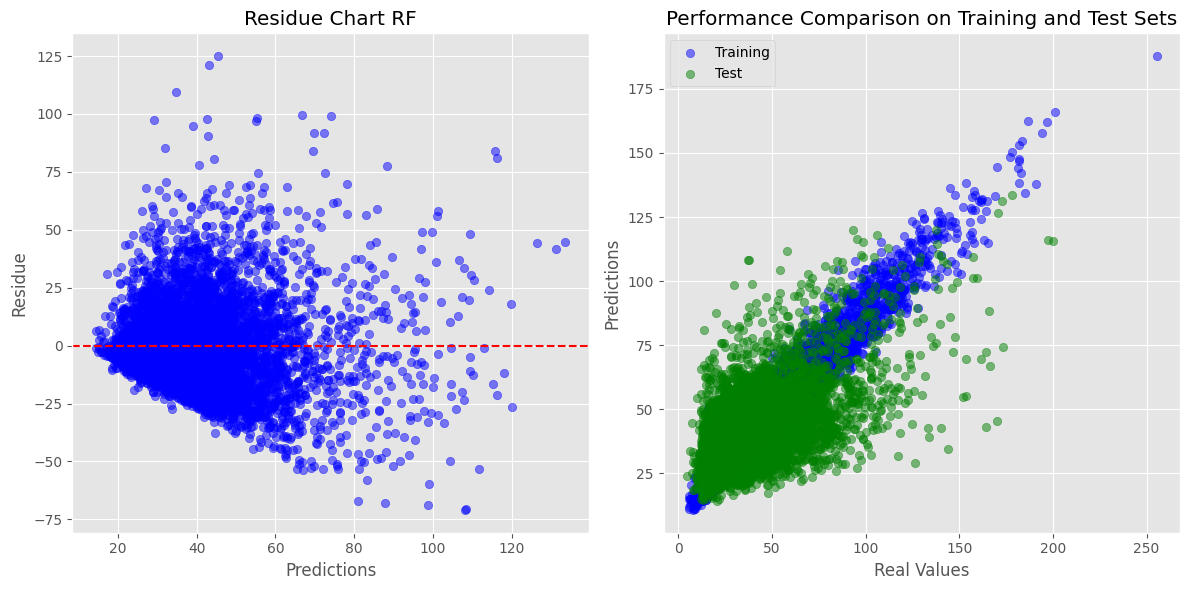

In [82]:
# Calculate residuals (difference between actual values and predictions)
residuals = y_teste - y_pred_rf

# Create a waste chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define style
plt.style.use('ggplot')

# Residue Chart
axes[0].scatter(y_pred_rf, residuals, color='blue', alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Predictions')
axes[0].set_ylabel('Residue')
axes[0].set_title('Residue Chart RF')

# Create a scatterplot to compare predictions with actual values in the training and testing sets
axes[1].scatter(y_treino, y_pred_rf_treino, color='blue', label='Training', alpha=0.5)
axes[1].scatter(y_teste, y_pred_rf, color='green', label='Test', alpha=0.5)
axes[1].set_xlabel('Real Values')
axes[1].set_ylabel('Predictions')
axes[1].set_title('Performance Comparison on Training and Test Sets')
axes[1].legend()

# Show graphics
plt.tight_layout()
plt.show()

Calculating performance metrics

In [92]:
mse_rf = mean_squared_error(y_teste, y_pred_rf)
mae_rf = mean_absolute_error(y_teste, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_teste, y_pred_rf)

print("RF Performance:")
print("MSE: ", mse_rf)
print("MAE: ", mae_rf)
print("RMSE: ", rmse_rf)
print("R²: ", r2_rf)

RF Performance:
MSE:  314.5907323186629
MAE:  12.968577208562335
RMSE:  17.736705791061173
R²:  0.36644936911636183


###Applying cross-validation

Cross-validation

In [83]:
# Initialize lists to store performance metrics for each fold
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Number of folds for cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)


for train_index, test_index in kf.split(x_treino):  # x_treino são as suas variáveis de entrada de treinamento
    X_train, X_test = x_treino.iloc[train_index], x_treino.iloc[test_index]
    y_train, y_test = y_treino.iloc[train_index], y_treino.iloc[test_index]

    # Train and evaluate the model as mentioned previously
    rf_model = RandomForestRegressor(n_estimators=estimator, random_state=0)  # Exemplo de hiperparâmetros
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store performance metrics in their respective lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

Calculating performance metrics

In [84]:
# Calculate summary metrics
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

# Display or store summary metrics
print("MSE Average:", avg_mse)
print("MAE Average:", avg_mae)
print("RMSE Average:", avg_rmse)
print("R² Average:", avg_r2)

MSE Average: 352.7360567030805
MAE Average: 13.388920982523848
RMSE Average: 18.780500286665223
R² Average: 0.3385273620544912


Plotting performance results

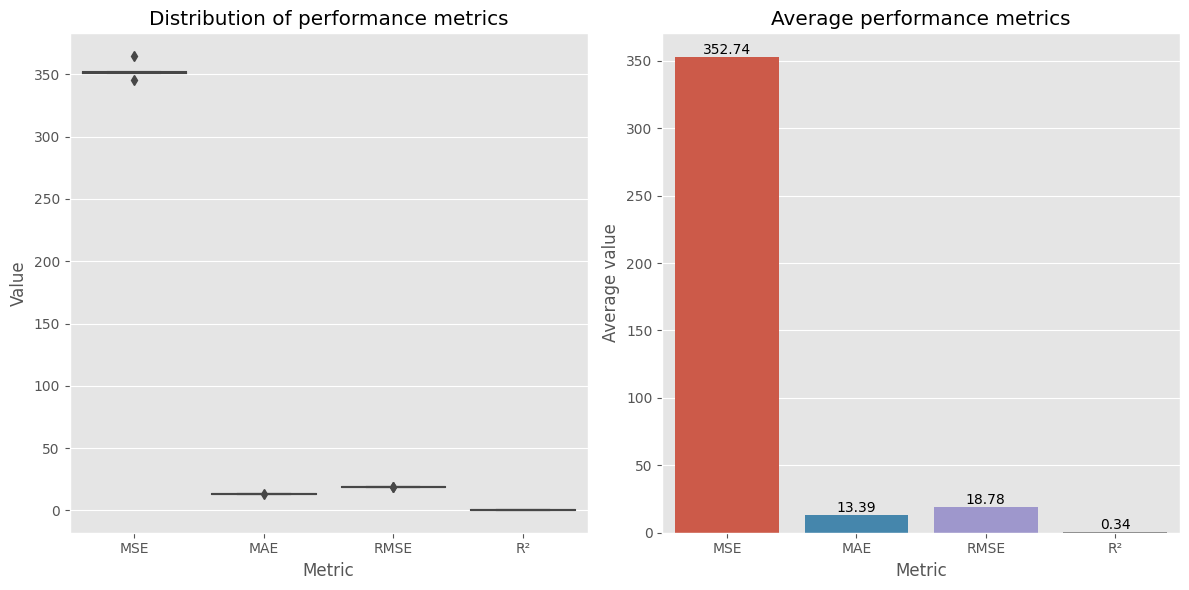

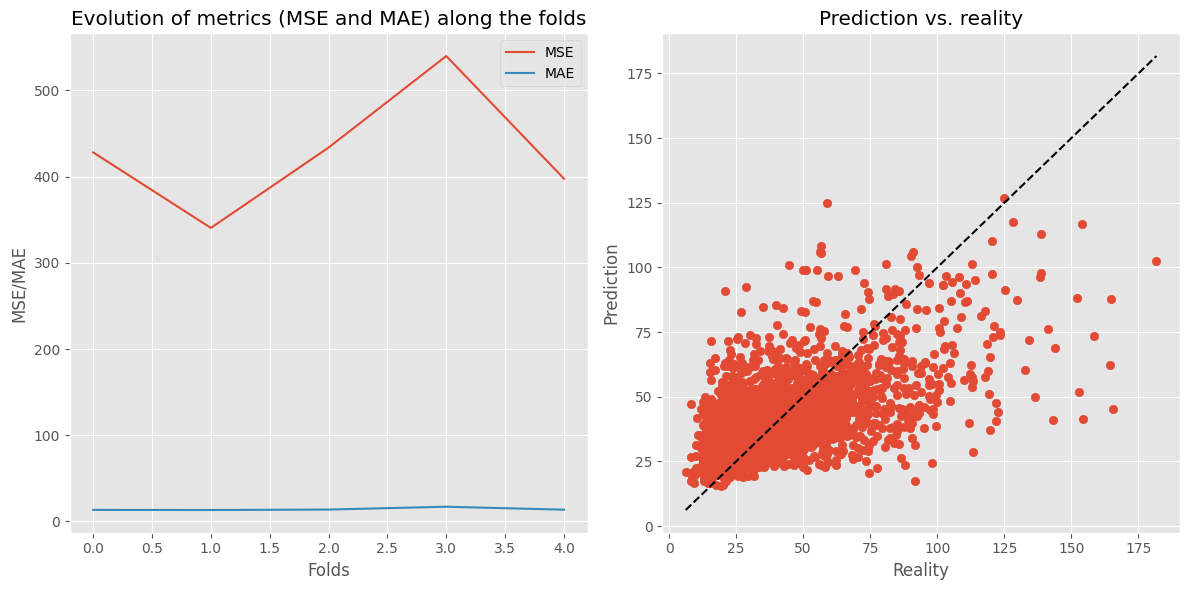

In [85]:
# Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores])
plt.xticks([0, 1, 2, 3], ['MSE', 'MAE', 'RMSE', 'R²'])
plt.title('Distribution of performance metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Bar Chart
plt.subplot(1, 2, 2)
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
metricas_labels = ['MSE', 'MAE', 'RMSE', 'R²']
sns.barplot(x=metricas_labels, y=metricas_medias)
plt.ylabel('Average value')
plt.title('Average performance metrics')
plt.xlabel('Metric')

for i, value in enumerate(metricas_medias):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Line Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mse_per_iteration, label='MSE')
plt.plot(mae_per_iteration, label='MAE')
plt.title('Evolution of metrics (MSE and MAE) along the folds')
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')
plt.legend()
plt.xlabel('Folds')
plt.ylabel('MSE/MAE')

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Prediction vs. reality')
plt.xlabel('Reality')
plt.ylabel('Prediction')

min_value = min(min(y_test), min(y_pred))
max_value = max(max(y_test), max(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()

# Show graphics
plt.show()


#Ensemble Prediction (EP)



###Applying the EP algorithm

Base model 1 (RF)

In [86]:
rf_model = RandomForestRegressor(n_estimators=estimator, random_state=0)
rf_model.fit(x_treino, y_treino)
y_pred_rf = rf_model.predict(x_teste)

Base model 2 (DNN)

In [87]:
rna_model = Sequential()
rna_model.add(Dense(units=64, activation='relu', input_dim=x_treino.shape[1]))
rna_model.add(Dense(units=32, activation='relu'))
rna_model.add(Dense(units=1, activation='linear'))
rna_model.compile(loss='mean_squared_error', optimizer='adam')
rna_model.fit(x_treino, y_treino, epochs=400, batch_size=32, verbose=0)
y_pred_rna = rna_model.predict(x_teste).flatten()

217/217 [==============================] - 0s 1ms/step


Compiling and training the top-level model (meta-model)

In [88]:
# Combine predictions from base models into a new dataset
ensemble_data = pd.DataFrame({'RF_Prediction': y_pred_rf, 'RNA_Prediction': y_pred_rna})

# Train a top-level model (meta-model)
meta_model = RandomForestRegressor(n_estimators=500, random_state=0)
meta_model.fit(ensemble_data, y_teste)

# Make predictions with the final model
ensemble_predictions = meta_model.predict(ensemble_data)

Plotting performance results

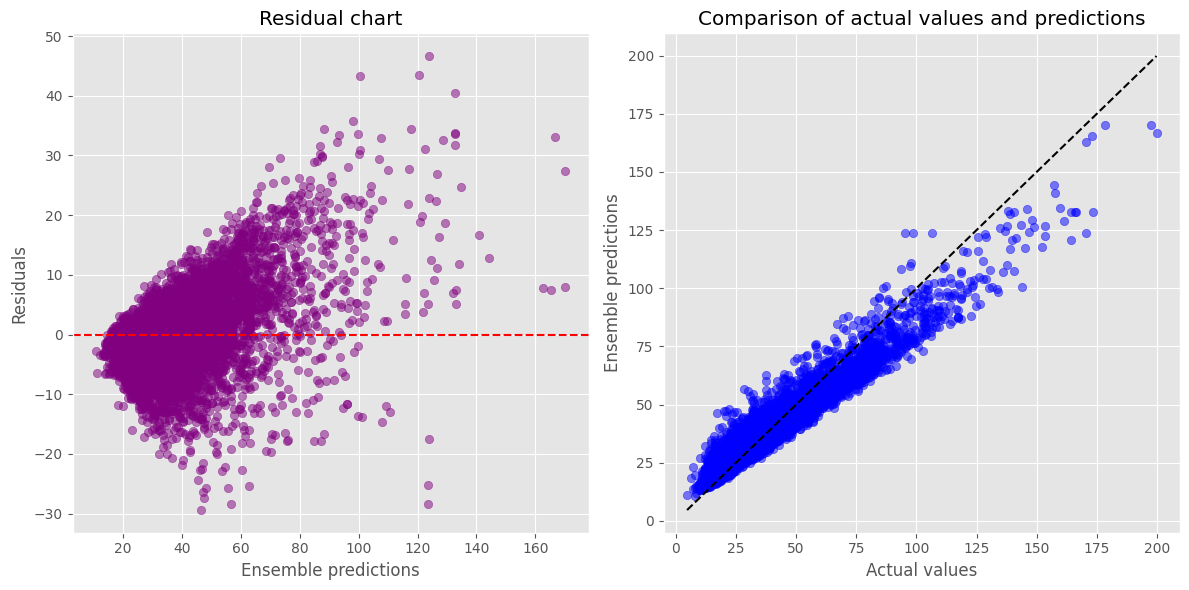

In [93]:
# Calculate residuals (difference between actual values and ensemble predictions)
residuals_ensemble = y_teste - ensemble_predictions

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define style
plt.style.use('ggplot')

# Residual Chart for Ensemble
axes[0].scatter(ensemble_predictions, residuals_ensemble, color='purple', alpha=0.5)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Ensemble predictions')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual chart')

# Scatter plot to compare ensemble predictions with actual values
axes[1].scatter(y_teste, ensemble_predictions, color='blue', alpha=0.5)
axes[1].plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='black')
axes[1].set_xlabel('Actual values')
axes[1].set_ylabel('Ensemble predictions')
axes[1].set_title('Comparison of actual values and predictions')

# Show graphics
plt.tight_layout()
plt.show()


Calculating performance metrics

In [90]:
mae_ensemble = mean_absolute_error(y_teste, ensemble_predictions)
mse_ensemble = mean_squared_error(y_teste, ensemble_predictions)
rmse_ensemble = np.sqrt(mse_ensemble)
r2_ensemble = r2_score(y_teste, ensemble_predictions)

print("EP Performance")
print("MAE: ", mae_ensemble)
print("MSE: ", mse_ensemble)
print("RMSE: ", rmse_ensemble)
print("R²: ", r2_ensemble)

EP Performance
MAE:  5.128261533121206
MSE:  49.574708515419914
RMSE:  7.040930940963696
R²:  0.9001620689067149


###Applying cross-validation

Cross-validation

131/131 [==============================] - 0s 1ms/step


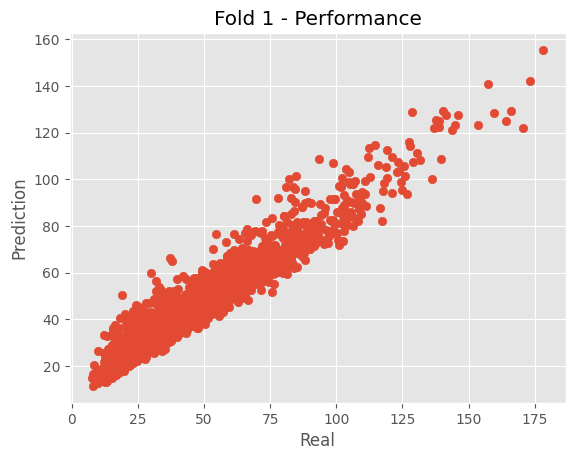

131/131 [==============================] - 0s 1ms/step


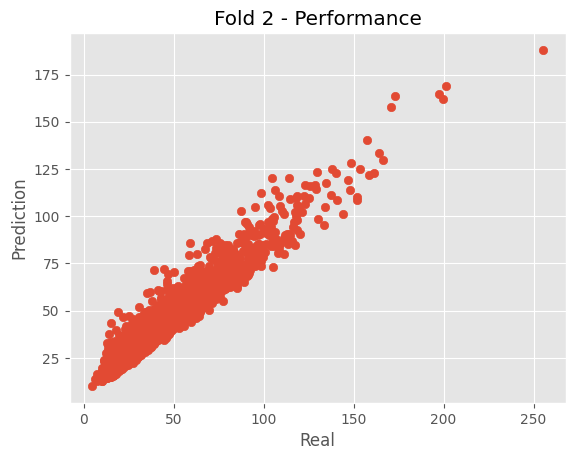

131/131 [==============================] - 0s 1ms/step


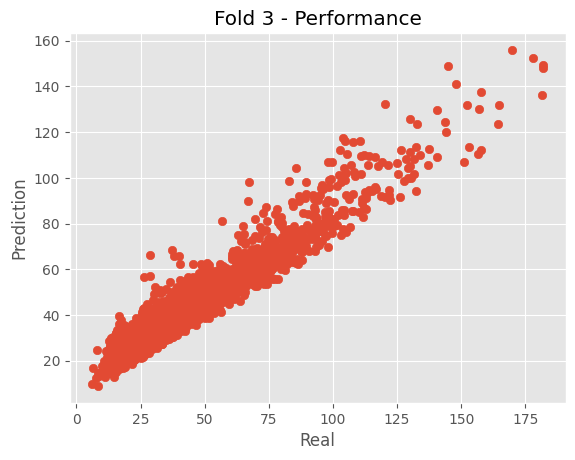

131/131 [==============================] - 0s 1ms/step


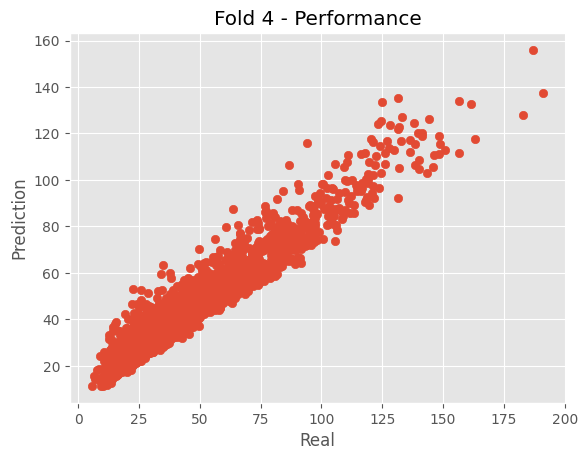

131/131 [==============================] - 0s 1ms/step


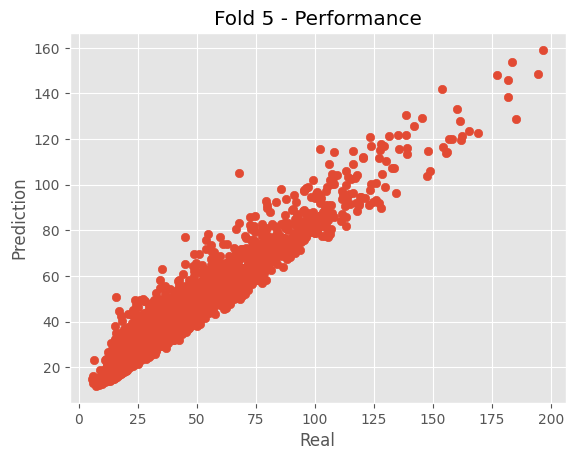

In [94]:
# Set the number of cross-validation folds
num_folds = 5
kf = KFold(n_splits=num_folds, random_state=0, shuffle=True)

# Lists to store performance metrics for each fold
mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

# Initialize the fold index
fold_index = 1

# Loop over the folds
for train_index, test_index in kf.split(x):
    x_treino, x_teste = x.iloc[train_index], x.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # Train a Random Forest model (base model 1)
    rf_model = RandomForestRegressor(n_estimators=estimator, random_state=0)
    rf_model.fit(x_treino, y_treino)
    y_pred_rf = rf_model.predict(x_teste)

    # Train an Artificial Neural Network (base model 2)
    rna_model = Sequential()
    rna_model.add(Dense(units=64, activation='relu', input_dim=x_treino.shape[1]))
    rna_model.add(Dense(units=32, activation='relu'))
    rna_model.add(Dense(units=1, activation='linear'))
    rna_model.compile(loss='mse', optimizer='adam')
    rna_model.fit(x_treino, y_treino, epochs=400, batch_size=32, verbose=0)
    y_pred_rna = rna_model.predict(x_teste).flatten()

    # Combine predictions from base models into a new dataset
    ensemble_data = pd.DataFrame({'RF_Prediction': y_pred_rf, 'RNA_Prediction': y_pred_rna})

    # Train a top-level model (meta-model)
    meta_model = RandomForestRegressor(n_estimators=500, random_state=0)
    meta_model.fit(ensemble_data, y_teste)

    # Make predictions with the final model
    ensemble_predictions = meta_model.predict(ensemble_data)

    # Calculate performance metrics for this fold
    mae = mean_absolute_error(y_teste, ensemble_predictions)
    mse = mean_squared_error(y_teste, ensemble_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_teste, ensemble_predictions)

    # Store metrics in their respective lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Create a performance graph for this fold
    plt.figure()
    plt.scatter(y_teste, ensemble_predictions)
    plt.title(f'Fold {fold_index} - Performance')
    plt.xlabel('Real')
    plt.ylabel('Prediction')
    plt.show()

    # Increment the fold index
    fold_index += 1

Calculating performance metrics

In [95]:
# Calculate the means and standard deviations of the metrics
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)
mse_mean = np.mean(mse_scores)
mse_std = np.std(mse_scores)
rmse_mean = np.mean(rmse_scores)
rmse_std = np.std(rmse_scores)
r2_mean = np.mean(r2_scores)
r2_std = np.std(r2_scores)

# Print the average metrics
print("MAE Average: ", mae_mean)
print("MSE Average: ", mse_mean)
print("RMSE Average: ", rmse_mean)
print("R² Average: ", r2_mean)


# Print the standard deviations
print("MAE Std: ", mae_std)
print("MSE Std: ", mse_std)
print("RMSE Std: ", rmse_std)
print("R² Std: ", r2_std)

MAE Average:  5.220896642482101
MSE Average:  53.41669408269168
RMSE Average:  7.304635153535105
R² Average:  0.8975495401617577
MAE Std:  0.1454870353720647
MSE Std:  3.557347948984621
RMSE Std:  0.24289783126007514
R² Std:  0.002060855873395478


Plotting performance results

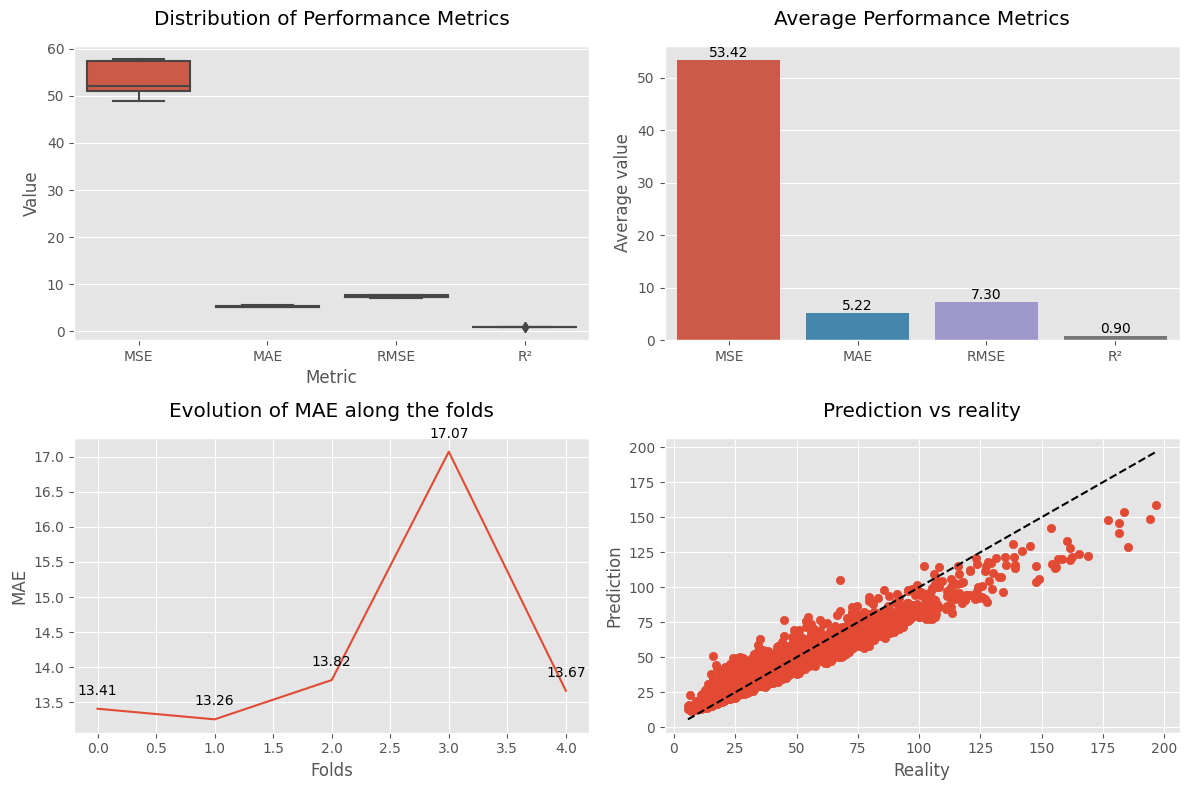

In [110]:
# Create the subplot structure
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, figure=fig)
def add_title_with_space(ax, title):
    ax.set_title(title, pad=15)

# Box Plot and Bar Chart
ax1 = fig.add_subplot(gs[0, 0])
ax = sns.boxplot(data=[mse_scores, mae_scores, rmse_scores, r2_scores], ax=ax1)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels(['MSE', 'MAE', 'RMSE', 'R²'])
add_title_with_space(ax1, 'Distribution of Performance Metrics')
ax1.set_xlabel('Metric')
ax1.set_ylabel('Value')

ax2 = fig.add_subplot(gs[0, 1])
metricas_medias = [np.mean(mse_scores), np.mean(mae_scores), np.mean(rmse_scores), np.mean(r2_scores)]
sns.barplot(x=metricas_labels, y=metricas_medias, ax=ax2)
ax2.set_ylabel('Average value')
add_title_with_space(ax2, 'Average Performance Metrics')

for i, value in enumerate(metricas_medias):
    ax2.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Line Chart
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(mae_per_iteration, label='MAE')
add_title_with_space(ax3, 'Evolution of MAE along the folds')
ax3.set_xlabel('Folds')
ax3.set_ylabel('MAE')

for i, mae_value in enumerate(mae_per_iteration):
    ax3.annotate(f'{mae_value:.2f}', (i, mae_value), textcoords="offset points", xytext=(0, 10), ha='center')

# Scatter Plot
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(y_teste, ensemble_predictions)
add_title_with_space(ax4, 'Prediction vs reality')
ax4.set_xlabel('Reality')
ax4.set_ylabel('Prediction')

min_value = min(min(y_teste), min(ensemble_predictions))
max_value = max(max(y_teste), max(ensemble_predictions))
ax4.plot([min_value, max_value], [min_value, max_value], linestyle='--', color='black')

plt.tight_layout()
plt.show()
